<a class="anchor" id="0.1"></a>
# Table of Contents

1. [Background](#1)
2. [Introduction](#2)
3. [Brief Introduction to the used libraries](#3)
4. [Understanding the data](#4)
5. [Importing the necessary libraries](#5)
6. [Loading the dataset](#6)
7. [Meet and Greet the data](#7)
8. [Pandas Profiling to get the overview of data](#8)
9. [Handling the missing values](#9)
10. [Data Visualization](#10)
   - 10.1 [Visualizing the outcome column](#10.1)
   - 10.2 [Plots to analyze the data](#10.2)
   - 10.3 [Visualizing the Outliers](#10.3)
   - 10.4 [Pairplot, Correlation matrix and HeatMap](#10.4)
   - 10.5 [Analysis of each parameter w.r.t outcome parameter](#10.5)
   - 10.6 [Analysis of each parameter with each respect to each other](#10.6)
11. [Conclusion](#11)


# 1.Background <a class="anchor" id="1"></a>


[Table of Contents](#0.1)

Every data has lot of hidden information. These hidden information was required to be investigated to find out the hidden patterns . These patterns can be helpful in making decisions on the procedure , removal of any ambiguity and also in getting key business insights. To solve all this questions, exploratory data analysis was introduced.

# 2.Introduction  <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Exploratory data analysis is all about getting and overall understanding of data. It is mainly done to find it’s properties , patterns and visualizations. It helps us to assure that our data is correct and ready to use for machine learning algorithms.Python has a wide variety of libraries like pandas , seaborn , numpy , matplotlib which can be used for this purpose. We are using the Pima Indians Dataset where it shows the various diagnostic factors influencing the diabetes.


# 3.Brief Introduction to the used libraries <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

As discussed above , we are going to use the following libraries to perform different operations on the data

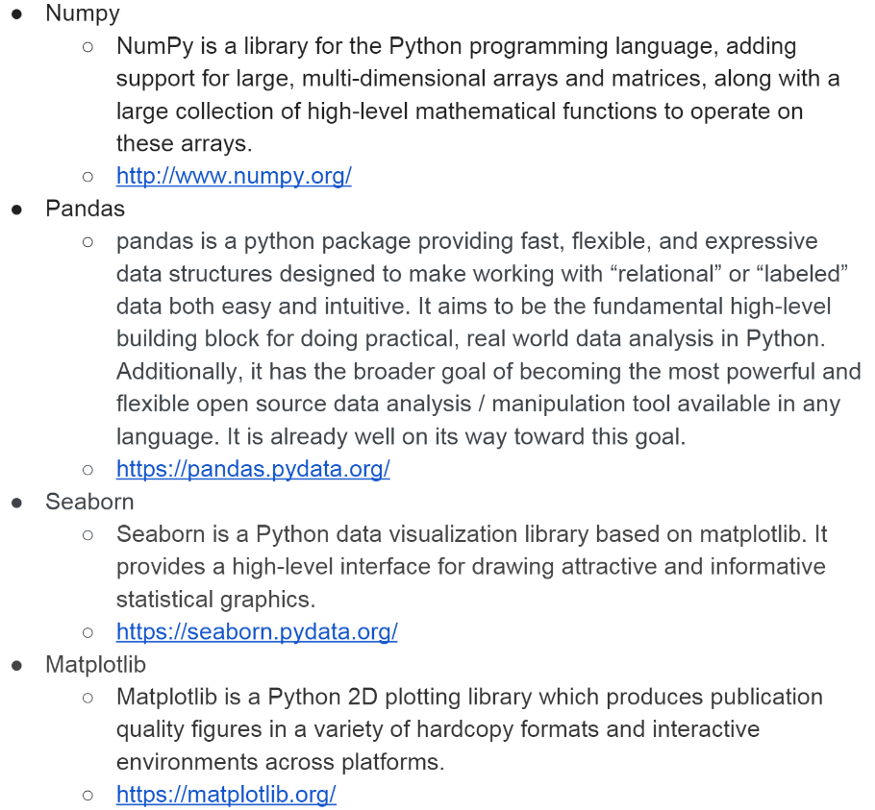


# 4.Understanding the data  <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Columns are following :-

**Pregnancies** :- Number of times pregnant

**Glucose**:- Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**:- Diastolic blood pressure (mm Hg)

**SkinThickness**:- Triceps skin fold thickness (mm)

**Insulin**:- 2-Hour serum insulin (mu U/ml)

**BMI**:- Body mass index (weight in kg/(height in m)²)

**DiabetesPedigreeFunction**:- Diabetes pedigree function

**Age**:-Age in years

**Outcome**:- Class variable (0 or 1) 268 of 768 are 1, the others are 0



# 5. Import Libraries <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 6.Loading the dataset  <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [ ]:
# Read the Dataset
pima_data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')


# 7. Meet and Greet the Dataset  <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

## 7.1 Overview of the Data

In [ ]:
#Top 5 Dataset
pima_data.head()


It shows that there are eight independent variables (Pregnancies,Glucose,Blood Pressure , SkinThickness ,Insulin, BMI, DiabetesPedigreeFunction, Age) and one dependent variable (Outcome).


In [ ]:
#Display the last 5 dataset

pima_data.tail()


In [ ]:
#Shape of the data 

pima_data.shape

In [ ]:
#Info of the data

pima_data.info()


It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.


In [ ]:
#Five Point summary of the data 

pima_data.describe()


# 8.Pandas Profiling to get the overview of the data <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(pima_data)


## 9. Handling the Missing Values <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


In [ ]:
# To check the missing values in the dataset

pima_data.isnull().values.any()

It shows that there are no null values (missing values) in the dataset. But, it does not make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.
 

In [ ]:
#Replace 0 to NaN

d=pima_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=pima_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

In [ ]:

# Find the number of Missing values

d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

### Handling the Missing values by replacing NaN to median


In [ ]:
#Replace NaN to mean value to explore dataset

pima_data['Glucose'].fillna(pima_data['Glucose'].median(),inplace=True)
pima_data['BloodPressure'].fillna(pima_data['BloodPressure'].median(),inplace=True)
pima_data['SkinThickness'].fillna(pima_data['SkinThickness'].median(),inplace=True)
pima_data['Insulin'].fillna(pima_data['Insulin'].median(),inplace=True)
pima_data['BMI'].fillna(pima_data['BMI'].median(),inplace=True)
pima_data.head()

# 10. Data visualization  <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

## 10.1 'Outcome' Anaysis  <a class="anchor" id="10.1"></a>

[Table of Contents](#0.1)


In [ ]:
# Analysing the Outcome

# To get the number of diabetic and Healthy person

pima_data.groupby('Outcome').size()

** The Data is biased towards people who are non-diabetics**

In [ ]:
# countplot----Plot the frequency of the Outcome

fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(pima_data['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

pima_data.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

**The first plot shows the count values of the outcome and second pieplot shows that 65.1% people are diabetic and 34.9% people are Healthy**



## 10.2 Plots to analyze the Dataset  <a class="anchor" id="10.2"></a>

[Table of Contents](#0.1)

In [ ]:
# Histogram 

pima_data.hist(figsize=(15,10))

In [ ]:

# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(pima_data['Pregnancies'],ax=ax2[0][0])
sns.distplot(pima_data['Glucose'],ax=ax2[0][1])
sns.distplot(pima_data['BloodPressure'],ax=ax2[1][0])
sns.distplot(pima_data['SkinThickness'],ax=ax2[1][1])
sns.distplot(pima_data['Insulin'],ax=ax2[2][0])
sns.distplot(pima_data['BMI'],ax=ax2[2][1])
sns.distplot(pima_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(pima_data['Age'],ax=ax2[3][1])

**The plots show that Glucose, Blood Pressure, BMI are normally distributed.Pregnancies, Insulin, Age, DiabetesPedigreeFunction are rightly skewed.**



## 10.3 Outliers  <a class="anchor" id="10.3"></a>

[Table of Contents](#0.1)

In [ ]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=pima_data.columns[i])
    sns.boxplot(pima_data[pima_data.columns[i]])


We have replaced the '0' value to median of the parameters. The plot shows outliers present in the dataset.

BloodPressure,SkinThickness,Insulin,BMI have outliers.It is clearly visible in the boxplots.

## 10.4 Pairplot, Correlation matrix and HeatMap  <a class="anchor" id="10.4"></a>

[Table of Contents](#0.1)

In [ ]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(pima_data,hue='Outcome')

**The plot shows that there is some relationship between parameters. Outcome is added as hue. We see that blue and orange dots are overlap. Also,**

1. Pregnancies and age have some kind of a linear line.
2. BloodPressure and age have little relation. Most of the aged people have BloodPressure.
3. Insulin and Glucose have some relation.

In [ ]:
# corrlation matrix 

cor=pima_data.corr()
cor

In [ ]:
# correlation plot---heatmap

sns.heatmap(cor,annot=True)

The correlation plot shows the relation between the parameters.

1. Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.
2. Insulin and DiabetesPedigreeFunction have little correlation with the outcome.
3. BloodPressure and SkinThickness have tiny correlation with the outcome.
4. There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

## 10.5 Bivariate Analysis Against the Outcome  <a class="anchor" id="10.5"></a>

[Table of Contents](#0.1)

### Analysis of 'Age' parameter


In [ ]:
a=pd.Series([])
for i in pima_data.index:
    if(pima_data.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(pima_data.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(pima_data.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(pima_data.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
pima_data['Age']=a
pima_data.head()

#Find the number of diabetic person in each age group

data1=pima_data[pima_data['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

In [ ]:
# Percentage of diabetic Person in each age group

data2=pima_data.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

It shows that 48% people are Diabetic in the age group of 31-40 and 59% people diabetic in the age group of 41-55.It depicts that the percentage of diabetic people in these age group is higher than the other age group.



In [ ]:
#4.1 barplot

sns.barplot(data1.index,data1['Diabetic %'])

It is evident from the barplot that percentage of women diagnosed with diabetic are in the age group between '31-55'. It means that the middle aged women are most likely to be diabetic than young or old women.



### Analysis of 'Pregnancies' parameter


In [ ]:
#6.Crosstab gives the fregency table information ----Pregnancies

pd.crosstab(pima_data['Pregnancies'],pima_data['Outcome'])

In [ ]:
# Categorical vs Continuous ----Outcome vs Pregnancies

fig, ax2 = plt.subplots(3, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Pregnancies", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['Pregnancies'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['Pregnancies'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['Pregnancies'], ax=ax2[1][1])
sns.violinplot(pima_data['Outcome'], pima_data['Pregnancies'], ax=ax2[2][0])
sns.countplot(x='Pregnancies',hue='Outcome',data=pima_data,ax=ax2[2][1])

**The plots show that pregnant people have more chance of diabeties.**



### Analysis of 'Glucose' parameter


In [ ]:
# Categorical vs Continuous ---- Outcome vs Glucose 

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Glucose", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['Glucose'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['Glucose'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['Glucose'], ax=ax2[1][1])

### Analysis of 'BloodPressure' parameter

In [ ]:
# Categorical vs Continuous ---- Outcome vs BloodPressure

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BloodPressure", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['BloodPressure'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['BloodPressure'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['BloodPressure'], ax=ax2[1][1])

### Analysis of 'SkinThickness' parameter


In [ ]:
# Categorical vs Continuous ----Outcome vs SkinThickness  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="SkinThickness", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['SkinThickness'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['SkinThickness'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['SkinThickness'], ax=ax2[1][1])

### Analysis of 'Insulin' parameter


In [ ]:
# Categorical vs Continuous ----Outcome vs Insulin  

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="Insulin", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['Insulin'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['Insulin'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['Insulin'], ax=ax2[1][1])

### Analysis of 'BMI' parameter

In [ ]:
# Categorical vs Continuous ----Outcome vs BMI

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="BMI", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['BMI'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['BMI'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['BMI'], ax=ax2[1][1])

### Analysis of 'DiabetesPedigreeFunction' parameter


In [ ]:
# Categorical vs Continuous ----Outcome vs DiabetesPedigreeFunction

fig, ax2 = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=pima_data,ax=ax2[0][0])
sns.barplot(pima_data['Outcome'], pima_data['DiabetesPedigreeFunction'],ax=ax2[0][1])
sns.stripplot(pima_data['Outcome'], pima_data['DiabetesPedigreeFunction'], jitter=True,ax=ax2[1][0])
sns.swarmplot(pima_data['Outcome'], pima_data['DiabetesPedigreeFunction'], ax=ax2[1][1])

## 10.6 Analysis of each parameter with each respect to each other <a class="anchor" id="10.6"></a>

[Table of Contents](#0.1)

### Analysis of 'Age' and 'Pregnancies'


In [ ]:
# lmplot---linear Regression plots
pima_data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

sns.pointplot(pima_data['Pregnancies'], pima_data['Age'], hue=pima_data['Outcome'])
sns.jointplot(pima_data['Pregnancies'], pima_data['Age'], kind='hex')
sns.lmplot(x='Pregnancies',y='Age',data=pima_data,hue='Outcome')

### Analysis of 'Insulin' and 'SkinThickness'


In [ ]:
sns.pointplot(pima_data['Insulin'], pima_data['SkinThickness'], hue=pima_data['Outcome'])
sns.jointplot(pima_data['Insulin'], pima_data['SkinThickness'], kind='hex')
sns.lmplot(x='Insulin',y='SkinThickness',data=pima_data,hue='Outcome')

### Analysis of BMI and SkinThickness


In [ ]:
sns.pointplot(pima_data['BMI'], pima_data['SkinThickness'], hue=pima_data['Outcome'])
sns.jointplot(pima_data['BMI'], pima_data['SkinThickness'], kind='hex')
sns.lmplot(x='BMI',y='SkinThickness',data=pima_data,hue='Outcome')

### Analysis of Insulin and Glucose


In [ ]:
sns.pointplot(pima_data['Insulin'], pima_data['Glucose'], hue=pima_data['Outcome'])
sns.jointplot(pima_data['Insulin'], pima_data['Glucose'], kind='hex')
sns.lmplot(x='Insulin',y='Glucose',data=pima_data,hue='Outcome')

# 11. Conclusion  <a class="anchor" id="11"></a>

[Table of Contents](#0.1)



1. The dataset have nine attributes(parameters) in which there are eight independent variables (Pregnancies,Glucose,Blood Pressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) and one dependent variable (Outcome).
2. BMI and DiabetesPedigreeFunction are a float data type and other parameters are integer data type.
3. The parameters do not contain any null values (missing values). However, this can not be true. As Insulin,SkinThickness,BloodPressure,BMI,Glucose have zero values.
4. The Outcome parameter shows that there are 500 healthy people and 268 Diabetic people.It means that 65% people are diabetic and 34.9% people are healthy.
5. The parameters Glucose, BloodPressure, BMI are normally distributed. Pregnancies,Insulin,Age,DiabetesPedigreeFunction are rightly skewed.
6. The missing values '0' is replaced by the mean of the parameter to explore the dataset.
7. BloodPressure,SkinThickness,Insulin,BMI have outliers.
8. There are no convincing relationship between the parameters.Pregnancies and age have some kind of a linear line. BloodPressure and age have little relation. Most of the aged people have BloodPressure.Insulin and Glucose have some relation.
9. Glucose, Age BMI and Pregnancies are the most Correlated features with the Outcome.Insulin and DiabetesPedigreeFunction have little correlation with the outcome. BloodPressure and SkinThickness have tiny correlation with the outcome.
10. Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose are little correlated.
11. The midle aged women are most likely to be diabetic than the young women. As the percentage of diabetic women are 48% and 59% in the age group of 31-40 and 41-55.
12. After Pregnancy people have more chance of diabeties.
13. People with high Glucose level are more likely to have diabeties.
14. People with high BloodPressure have more chance of diabeties.
15. People with high Insulin level are more likely to have Diabetes.